In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
hour_df = pd.read_csv("hour.csv")

## Task 1: Data Loading and Initial Exploration

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.rename(columns={'instant':'id',
                        'dteday':'date',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'count'},inplace=True)

hour_df['date'] = pd.to_datetime(hour_df.date)

hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather'] = hour_df.weather.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')




In [5]:
hour_df.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

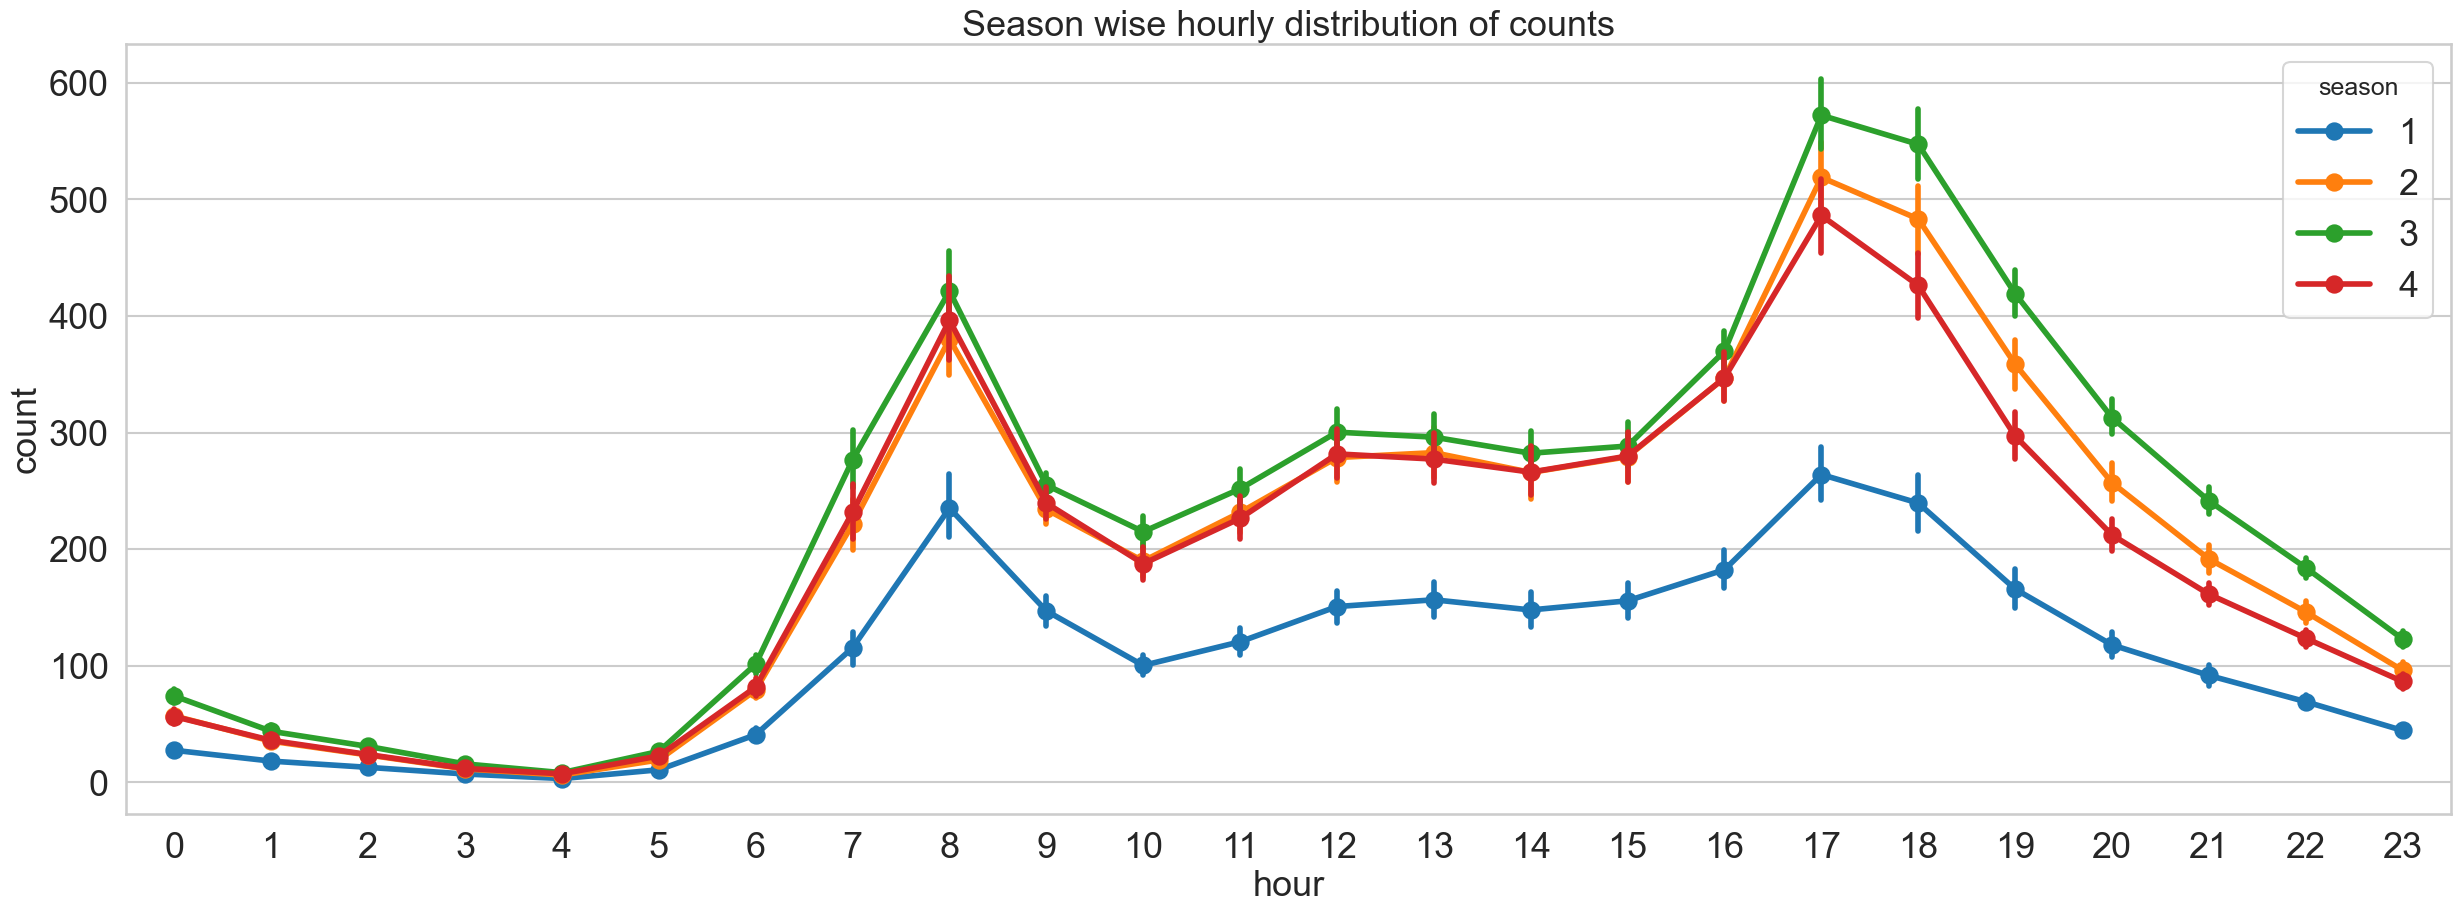

In [7]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'count',
                           'season']],
              x='hour',
              y='count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

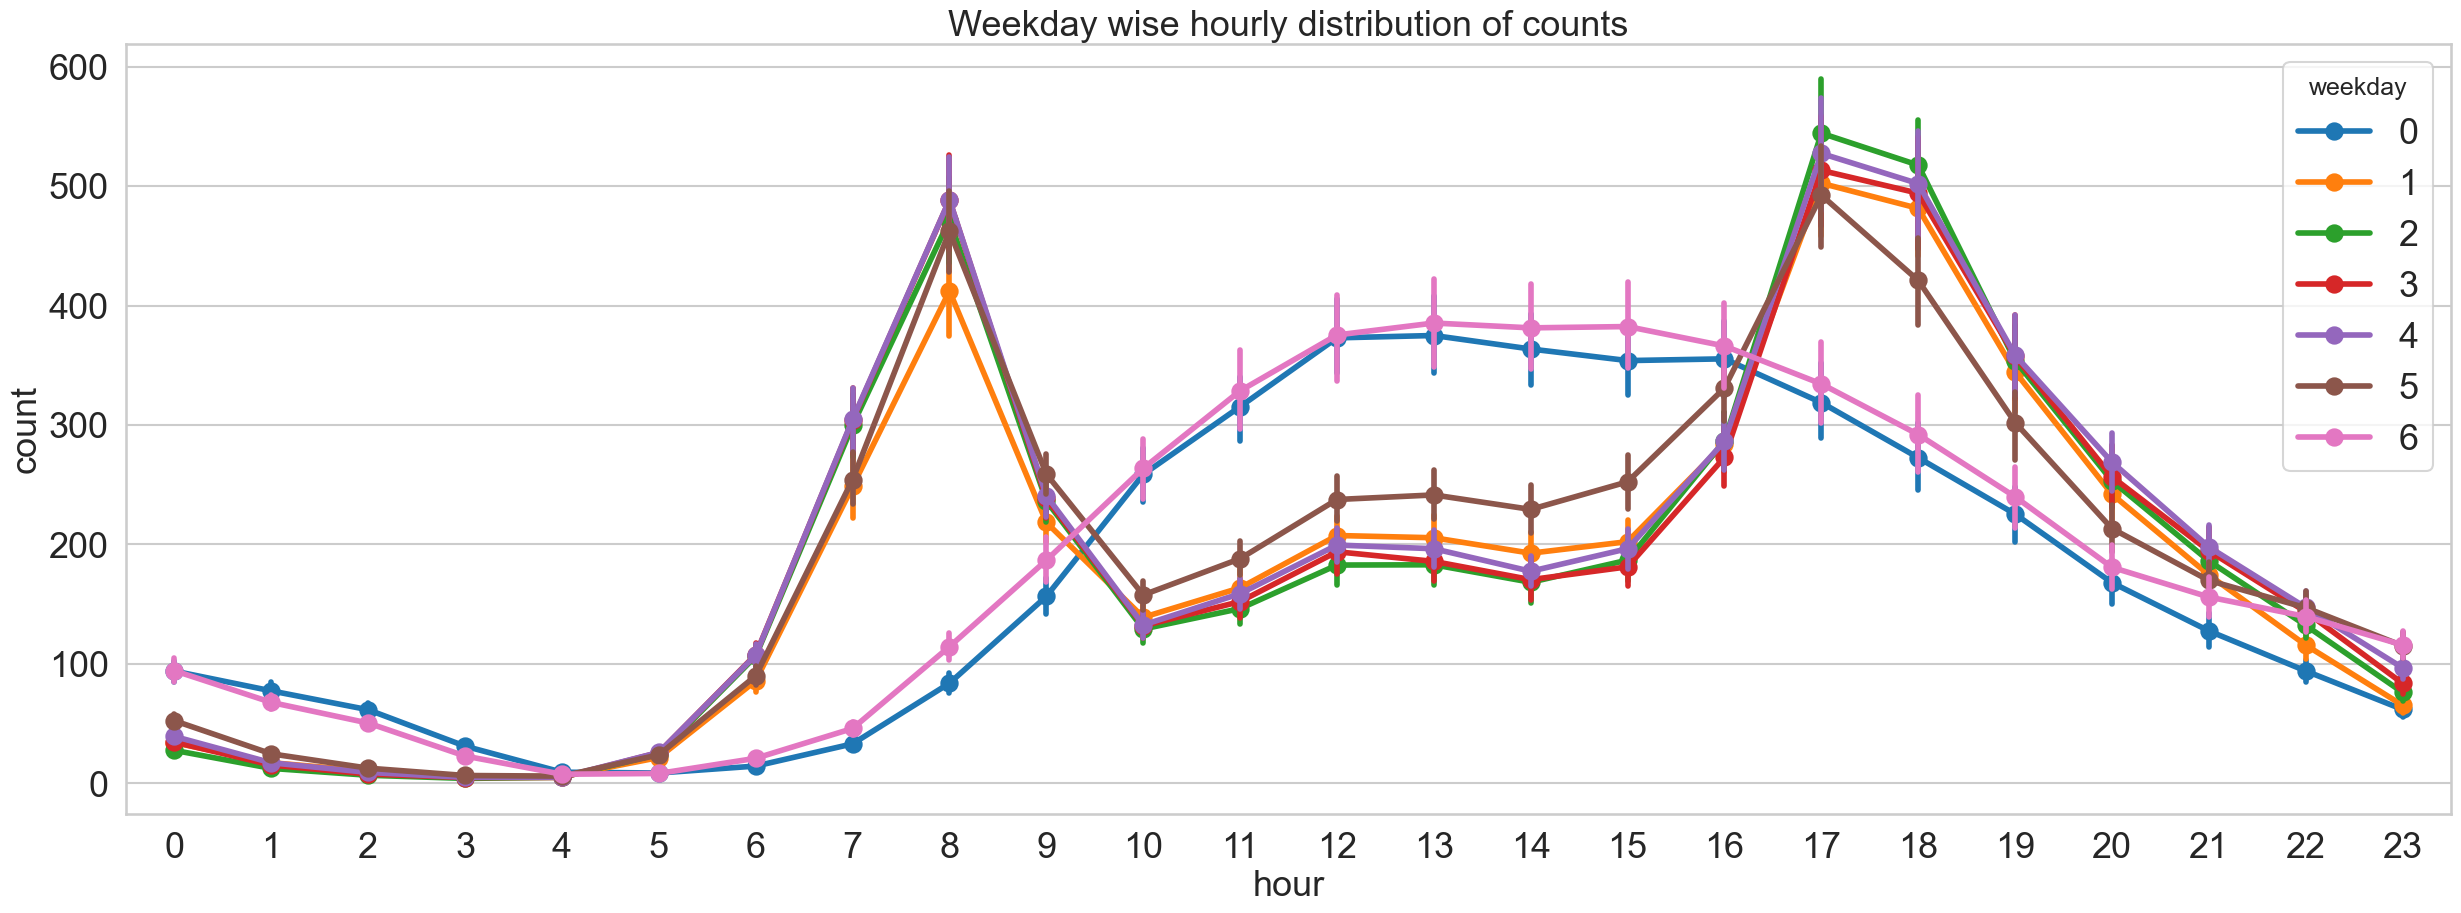

In [8]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'count',
                           'weekday']],
              x='hour',
              y='count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

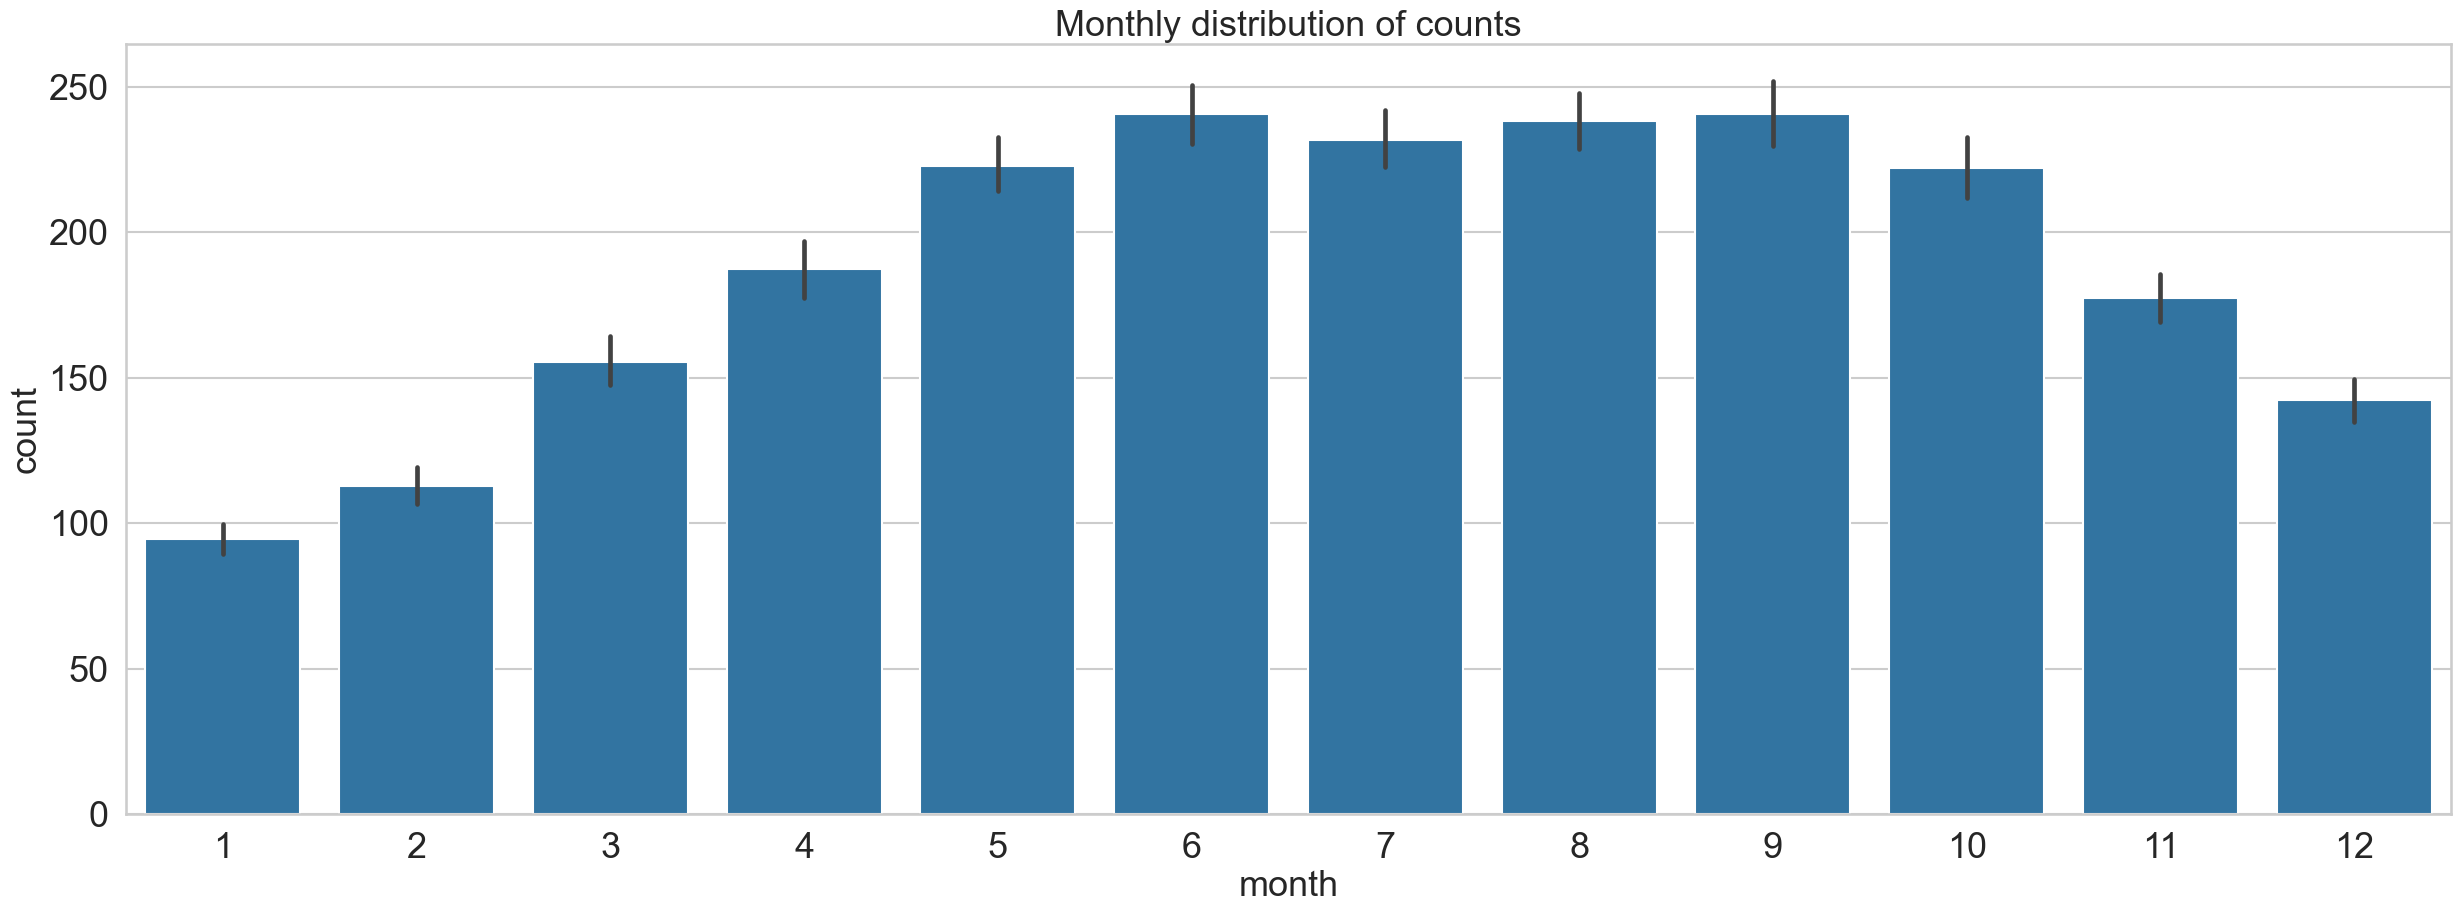

In [9]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['month',
                           'count']],
              x='month',
              y='count',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Seasonal distribution of counts')]

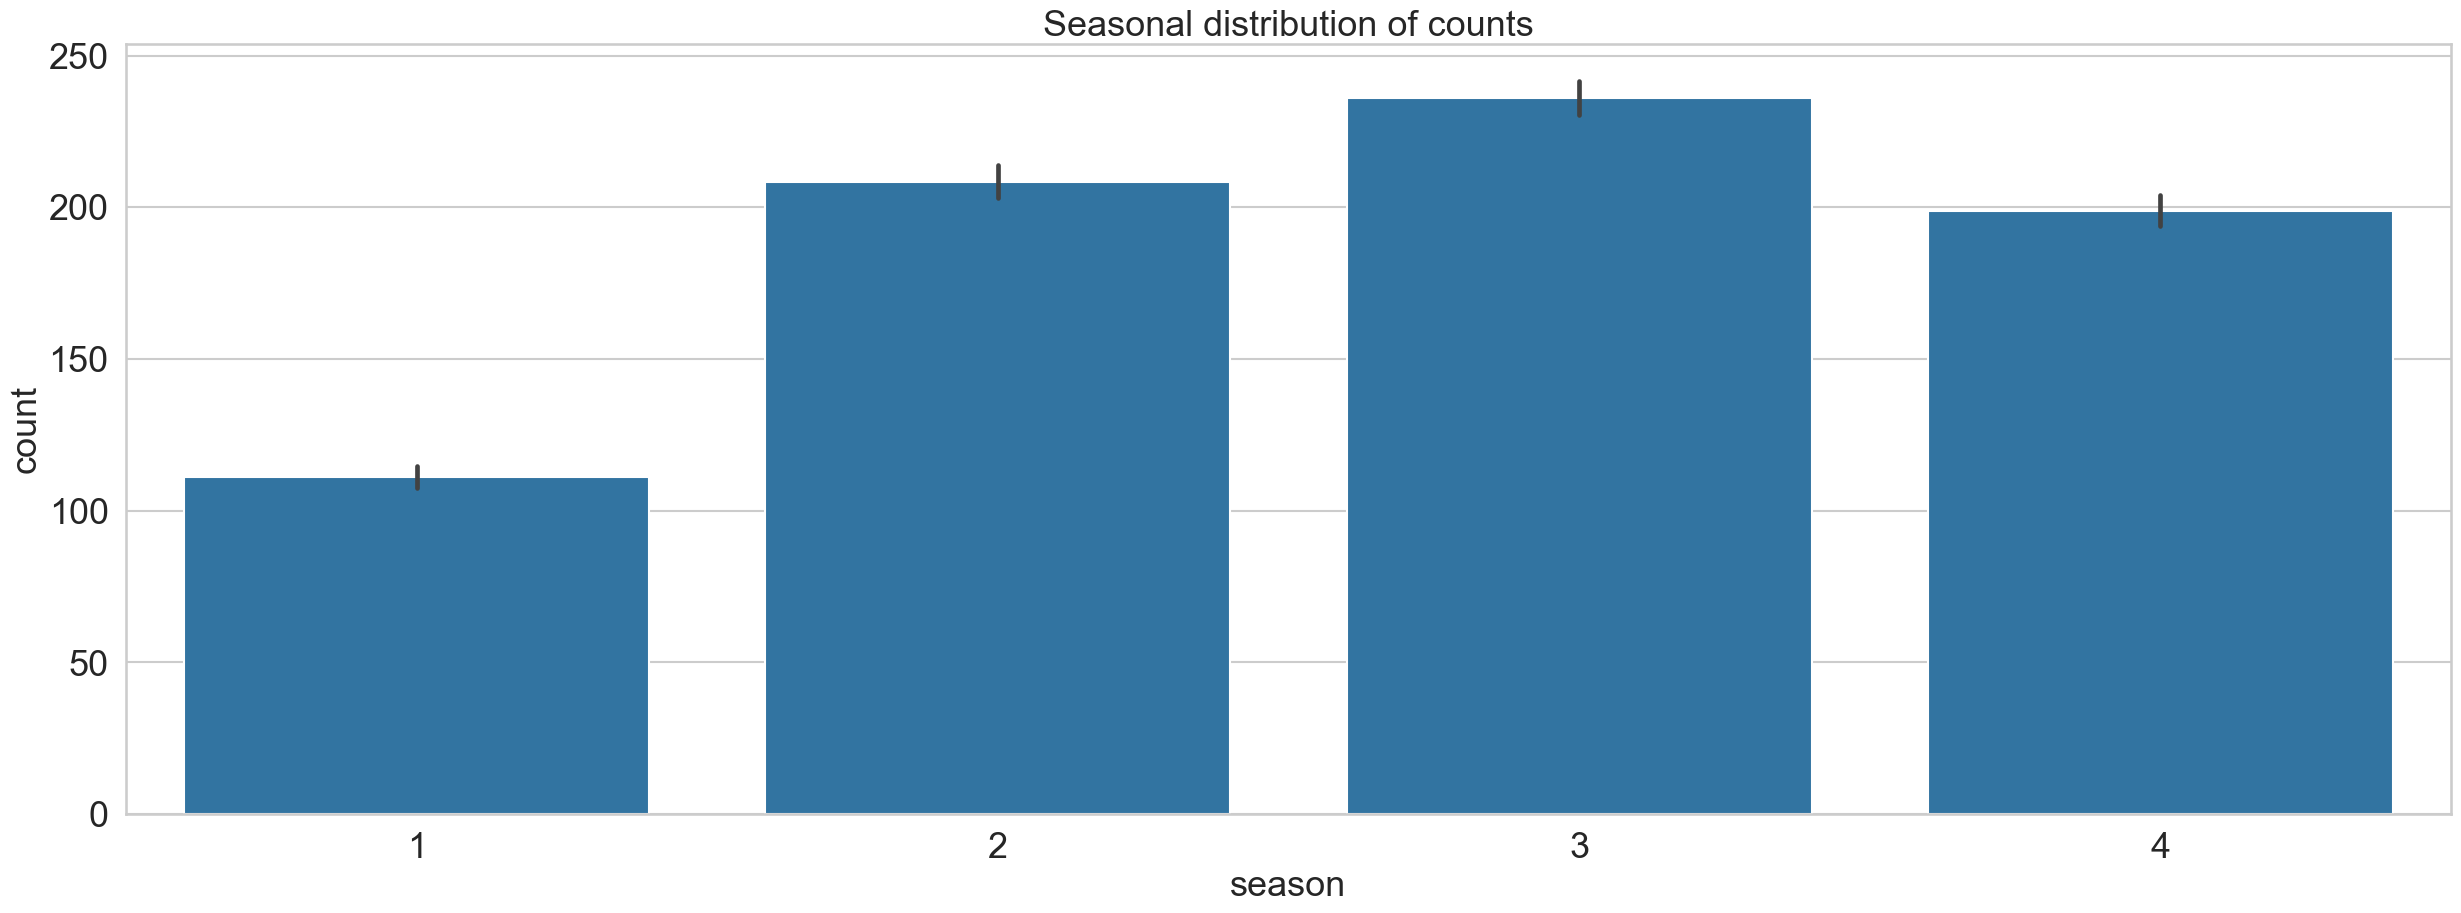

In [10]:
fig,ax = plt.subplots()
sns.barplot(data=hour_df[['season',
                           'count']],
              x='season',
              y='count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")

[Text(0.5, 1.0, 'Year distribution of counts')]

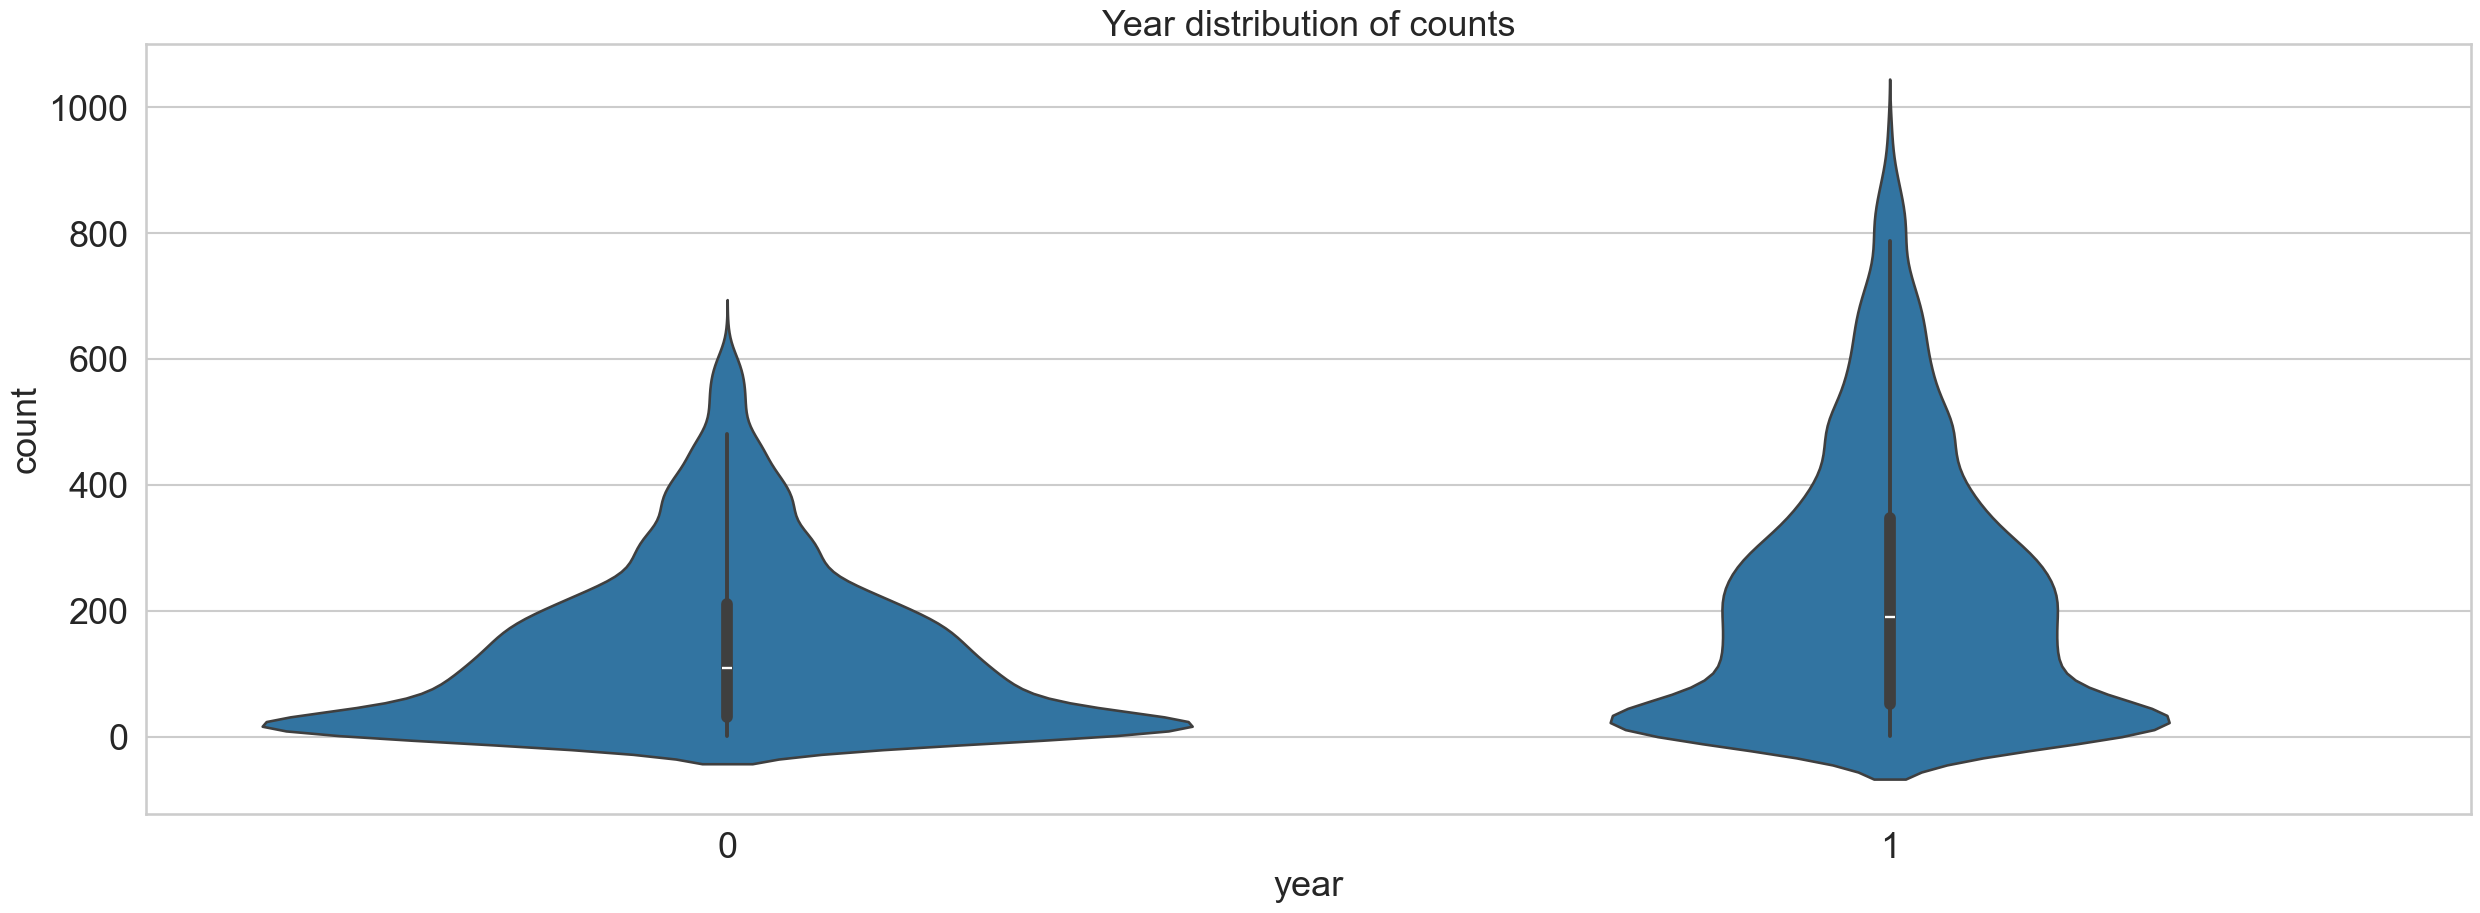

In [11]:
fig,ax = plt.subplots()
sns.violinplot(data=hour_df[['year',
                           'count']],
              x='year',
              y='count',
              ax=ax)
ax.set(title="Year distribution of counts")

<Axes: >

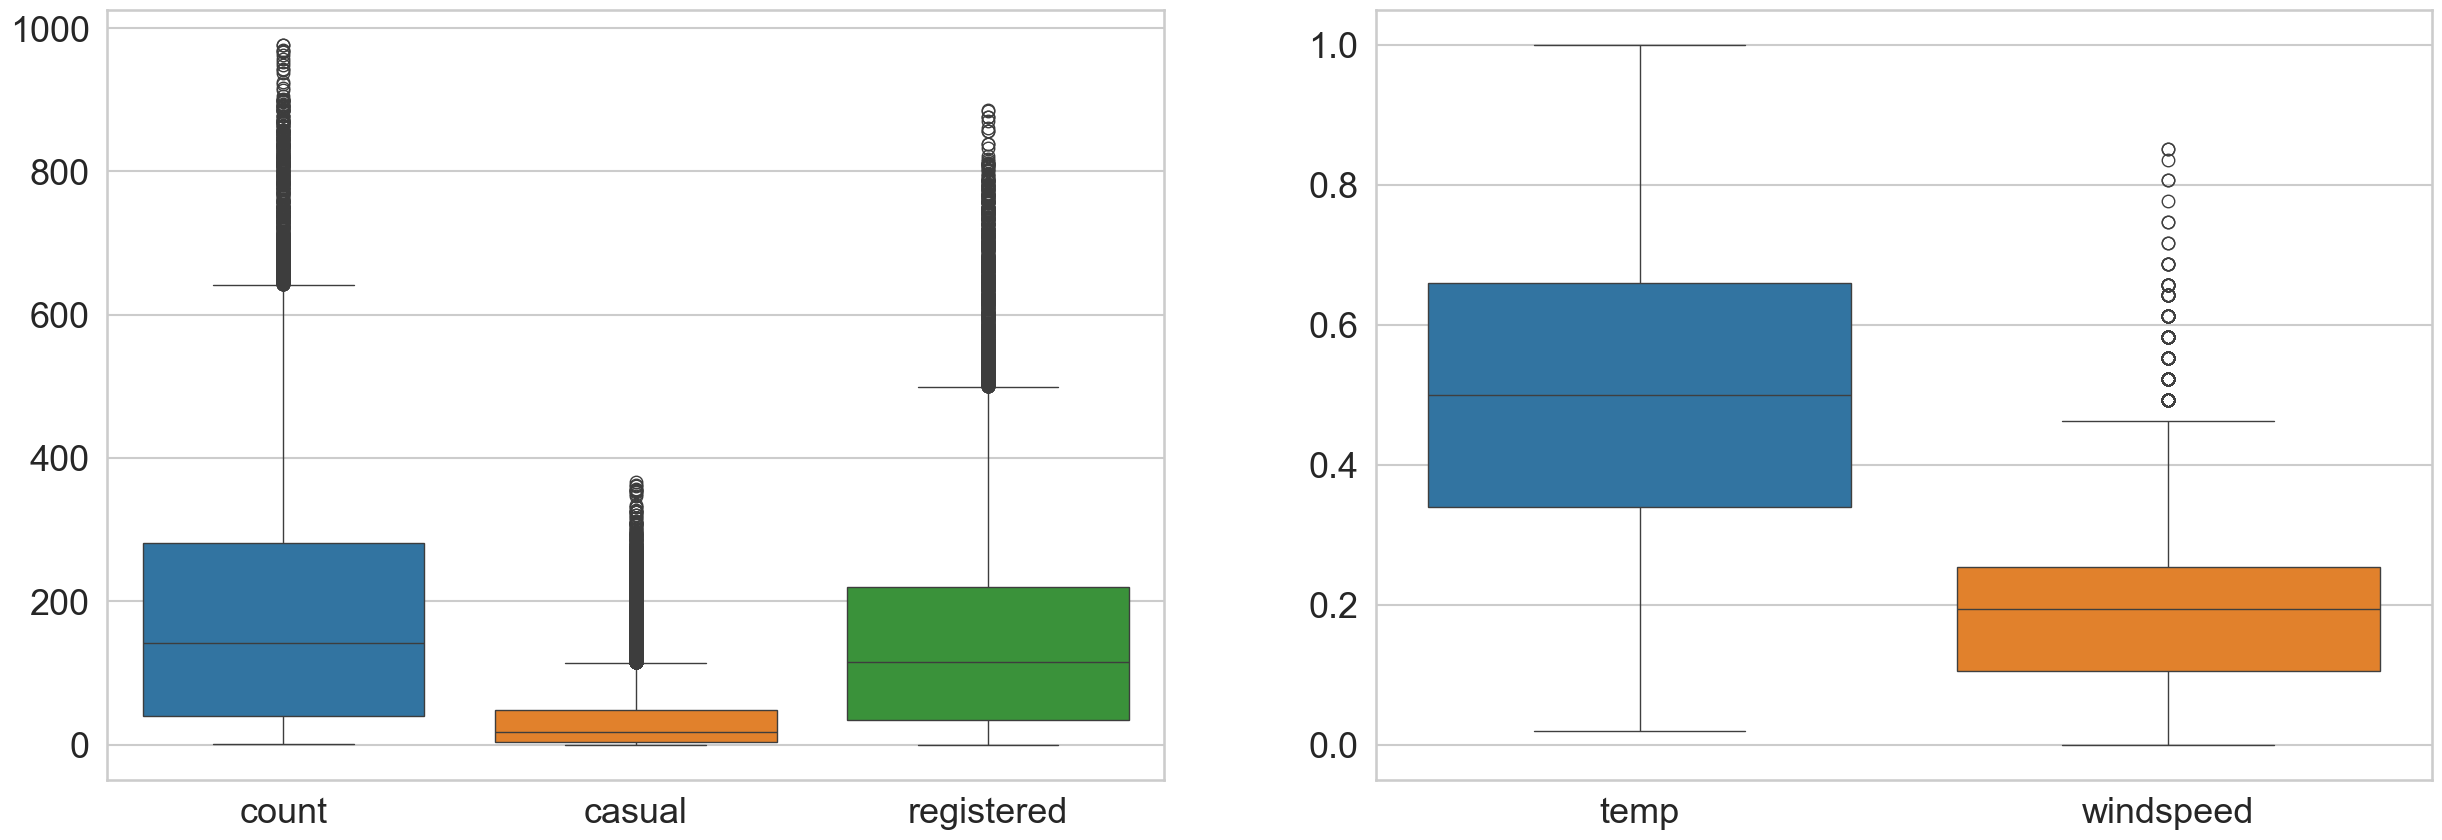

In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['count',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp',
                          'windspeed']],ax=ax2)

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

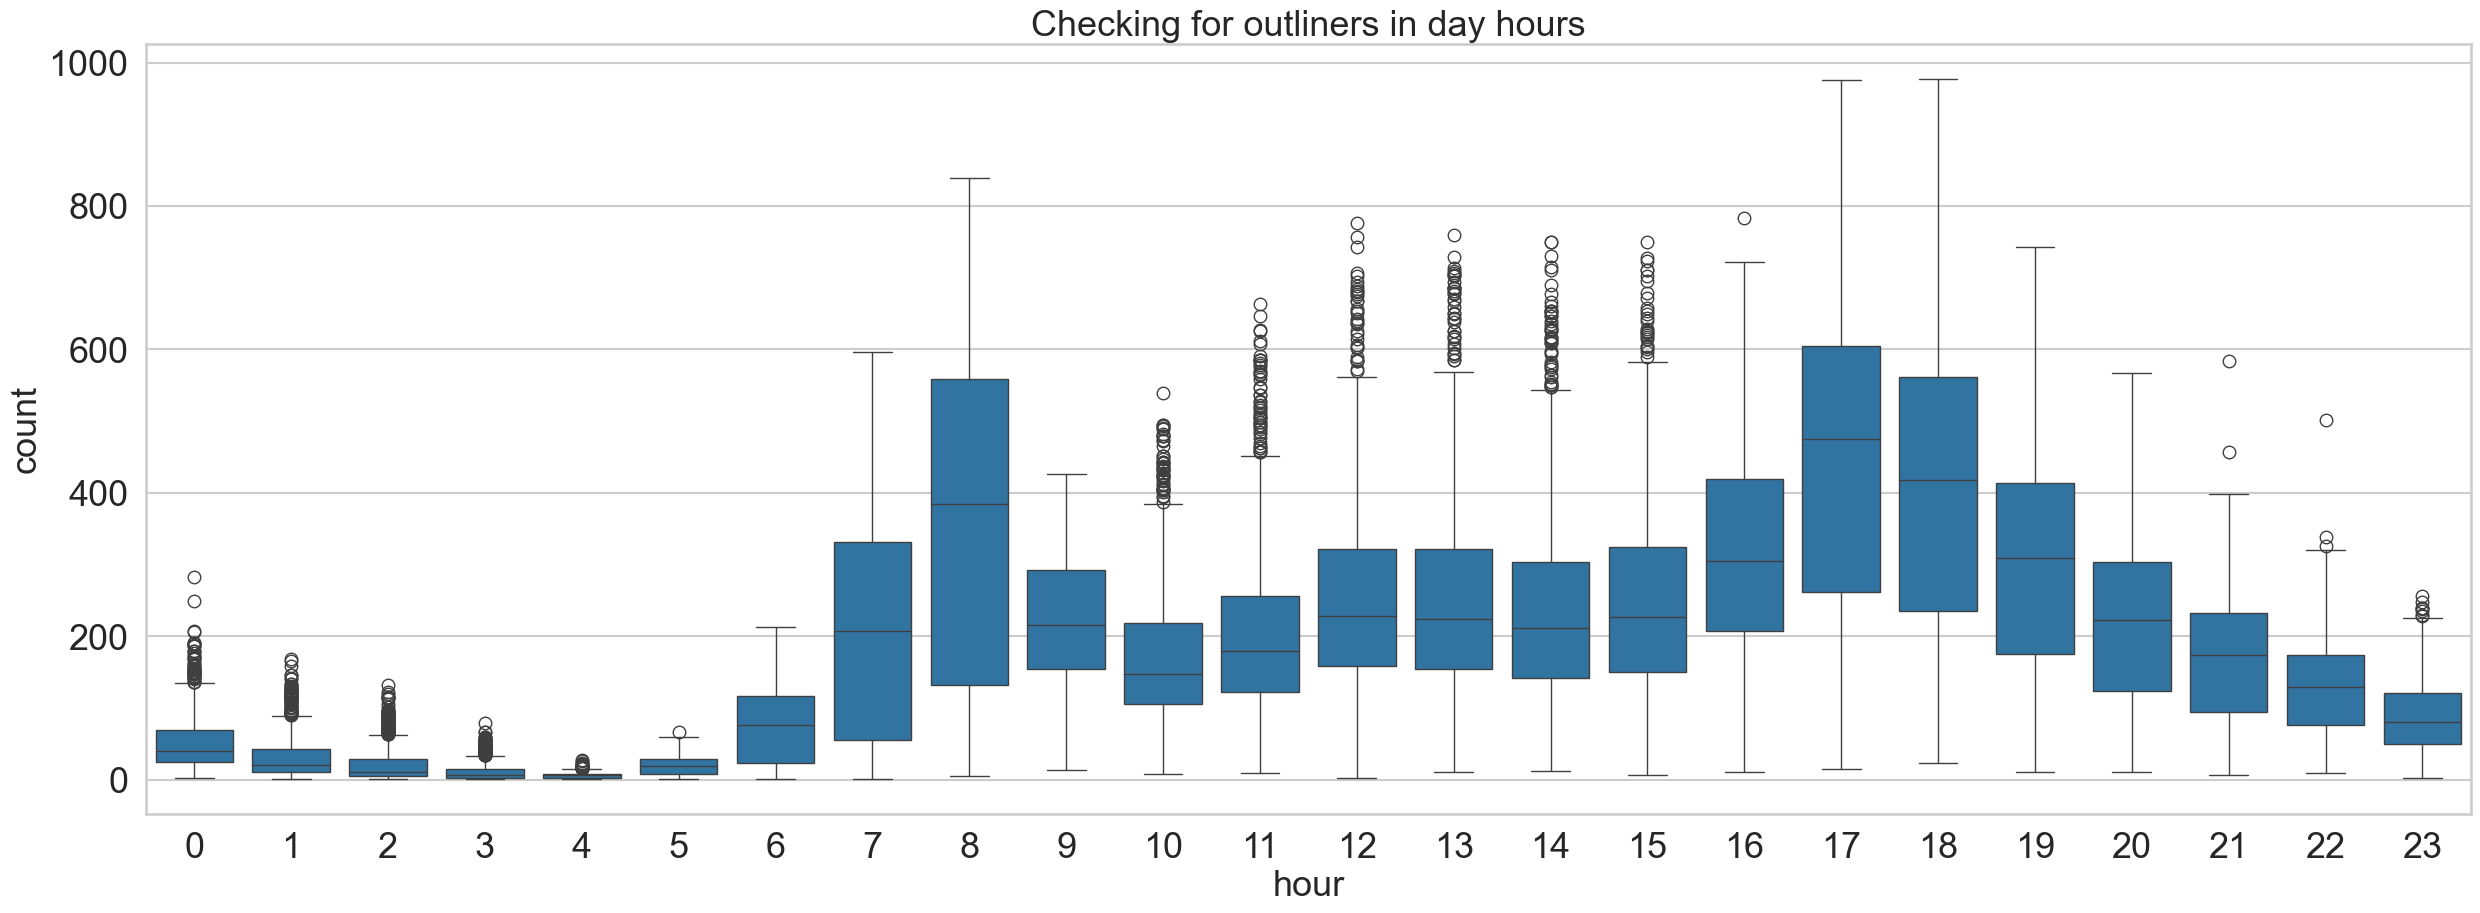

In [13]:
fig,ax = plt.subplots()
sns.boxplot(data=hour_df[['count',
                          'hour']],x='hour',y='count',ax=ax)
ax.set(title="Checking for outliners in day hours")

<Axes: >

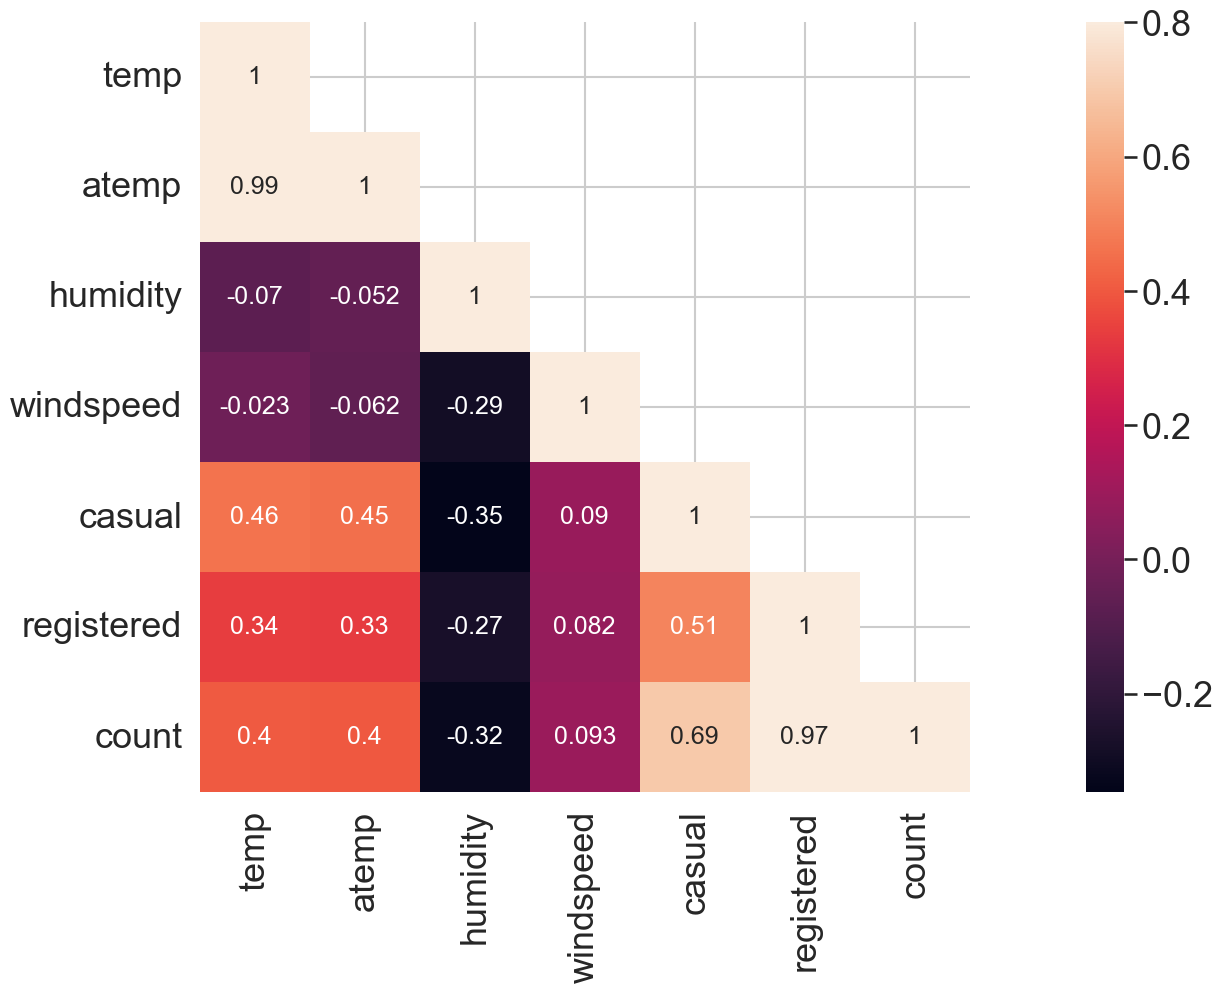

In [14]:
corrMatt = hour_df[['temp',
                'atemp', 
                'humidity', 
                'windspeed', 
                'casual', 
                'registered', 
                'count']].corr()

mask = np.triu(np.ones_like(corrMatt), k=1).astype(bool)
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

drop atemp

In [15]:
hour_df = hour_df.drop(columns=['atemp'])
hour_df.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


### 1. Pearson Correlation Analysis

In [16]:
    # Select numeric columns
correlations = hour_df[['temp','humidity','windspeed','count']].corr()['count'].drop('count')
    
# Print correlations with target variable
print(correlations)

temp         0.404772
humidity    -0.322911
windspeed    0.093234
Name: count, dtype: float64


### 2. Mutual Information Analysis


In [17]:
# Convert datetime column to numeric timestamp first
hour_df['date'] = pd.to_numeric(hour_df['date'])

# Handle categorical features by encoding them
categorical_cols = ['season', 'year', 'month', 'hour', 'weekday', 'weather', 'is_holiday', 'is_workingday']
encoded_hour_df = hour_df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    encoded_hour_df[col] = le.fit_transform(encoded_hour_df[col])

# Separate features (X) and target (y)
X = encoded_hour_df.drop('count', axis=1)
y = encoded_hour_df['count']

# Calculate mutual information
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nMutual Information with 'count':")
print(mi_scores)


Mutual Information with 'count':
registered       2.259029
casual           0.747439
hour             0.622149
id               0.159953
temp             0.146191
date             0.143169
humidity         0.101652
month            0.074242
season           0.059080
year             0.044617
windspeed        0.025967
weather          0.018556
weekday          0.016517
is_workingday    0.008567
is_holiday       0.000000
dtype: float64


### 3. Chi2

In [18]:
# Create a contingency table
contingency_table = pd.crosstab(hour_df['weather'], hour_df['season'])

# Perform the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test between 'season' and 'weather':")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")


Chi-square test between 'season' and 'weather':
Chi2 Statistic: 168.67912163587522
P-value: 1.1626263980984891e-31


### 4. ANOVA

In [19]:
def anova_test(df, categorical_col, target_col='count'):
    groups = df.groupby(categorical_col)[target_col].apply(list)
    f_statistic, p_value = f_oneway(*groups)
    print(f"\nANOVA F-test for '{target_col}' vs '{categorical_col}':")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

categorical_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather', 'is_holiday', 'is_workingday']
for col in categorical_features:
    anova_test(hour_df, col)


ANOVA F-test for 'count' vs 'season':
F-statistic: 409.1810372630525
P-value: 7.40107139971279e-257

ANOVA F-test for 'count' vs 'year':
F-statistic: 1163.3651667050667
P-value: 7.213184208630547e-247

ANOVA F-test for 'count' vs 'month':
F-statistic: 128.1021897089323
P-value: 5.505684936484358e-284

ANOVA F-test for 'count' vs 'hour':
F-statistic: 759.0862809702604
P-value: 0.0

ANOVA F-test for 'count' vs 'weekday':
F-statistic: 3.487790047928153
P-value: 0.0018990310434746603

ANOVA F-test for 'count' vs 'weather':
F-statistic: 127.17386949967266
P-value: 1.7347820521802623e-81

ANOVA F-test for 'count' vs 'is_holiday':
F-statistic: 16.636980484977737
P-value: 4.546168948722016e-05

ANOVA F-test for 'count' vs 'is_workingday':
F-statistic: 15.95182279420313
P-value: 6.524264547054267e-05


/var/folders/qz/x2_8w011543gtsdb396j2yj00000gn/T/ipykernel_97576/3856228460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby(categorical_col)[target_col].apply(list)


### 5. VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features (including potentially correlated ones)
numerical_features_vif = hour_df[['temp', 'humidity', 'windspeed']]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features_vif.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_features_vif.values, i) for i in range(numerical_features_vif.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
     feature       VIF
0       temp  5.251163
1   humidity  4.834319
2  windspeed  2.697280


In [21]:
hour_df.drop(columns=['date','id','casual','registered'],inplace=True)
hour_df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


TODO LATER:
look at anomalies, suspicions, etc

# 2. Data splitting

In [22]:
hour_df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather,temp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


To efficiently split the data, I first made sure to separate the features (X) and target variable (Y).

In [23]:
X = hour_df.drop(['count'], axis=1)
y = hour_df['count']

I split the data chronologically with a 60-20-20 ratio (train-validation-test) to:
1. Maintain temporal order, which is crucial for bike sharing data as it exhibits seasonal and temporal patterns
2. Ensure the model is evaluated on future data, simulating real-world conditions where we predict upcoming bike rentals
3. Have sufficient data in each split while preserving the time-series nature of the problem

The chronological split is particularly important because:
- Bike rentals show strong seasonal trends
- Weather patterns affect rentals sequentially
- Random splitting would leak future information into the training set, leading to unrealistic performance estimates

In [24]:
# Calculate split indices
n = len(hour_df)
train_size = 0.6
val_size = 0.2
test_size = 0.2

train_end = int(n * train_size)
val_end = int(n * (train_size + val_size))

# Split the data
X_train = X[:train_end]
y_train = y[:train_end]

X_val = X[train_end:val_end]
y_val = y[train_end:val_end]

X_test = X[val_end:]
y_test = y[val_end:]

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Verify split proportions
print("\nSplit proportions:")
print(f"Training: {len(X_train)/n:.2%}")
print(f"Validation: {len(X_val)/n:.2%}")
print(f"Test: {len(X_test)/n:.2%}")

Training set shape: (10427, 11) (10427,)
Validation set shape: (3476, 11) (3476,)
Test set shape: (3476, 11) (3476,)

Split proportions:
Training: 60.00%
Validation: 20.00%
Test: 20.00%


Target (count) Statistics:

Train:
Mean: 144.80
Std: 134.62

Validation:
Mean: 264.16
Std: 215.53

Test:
Mean: 248.75
Std: 220.52


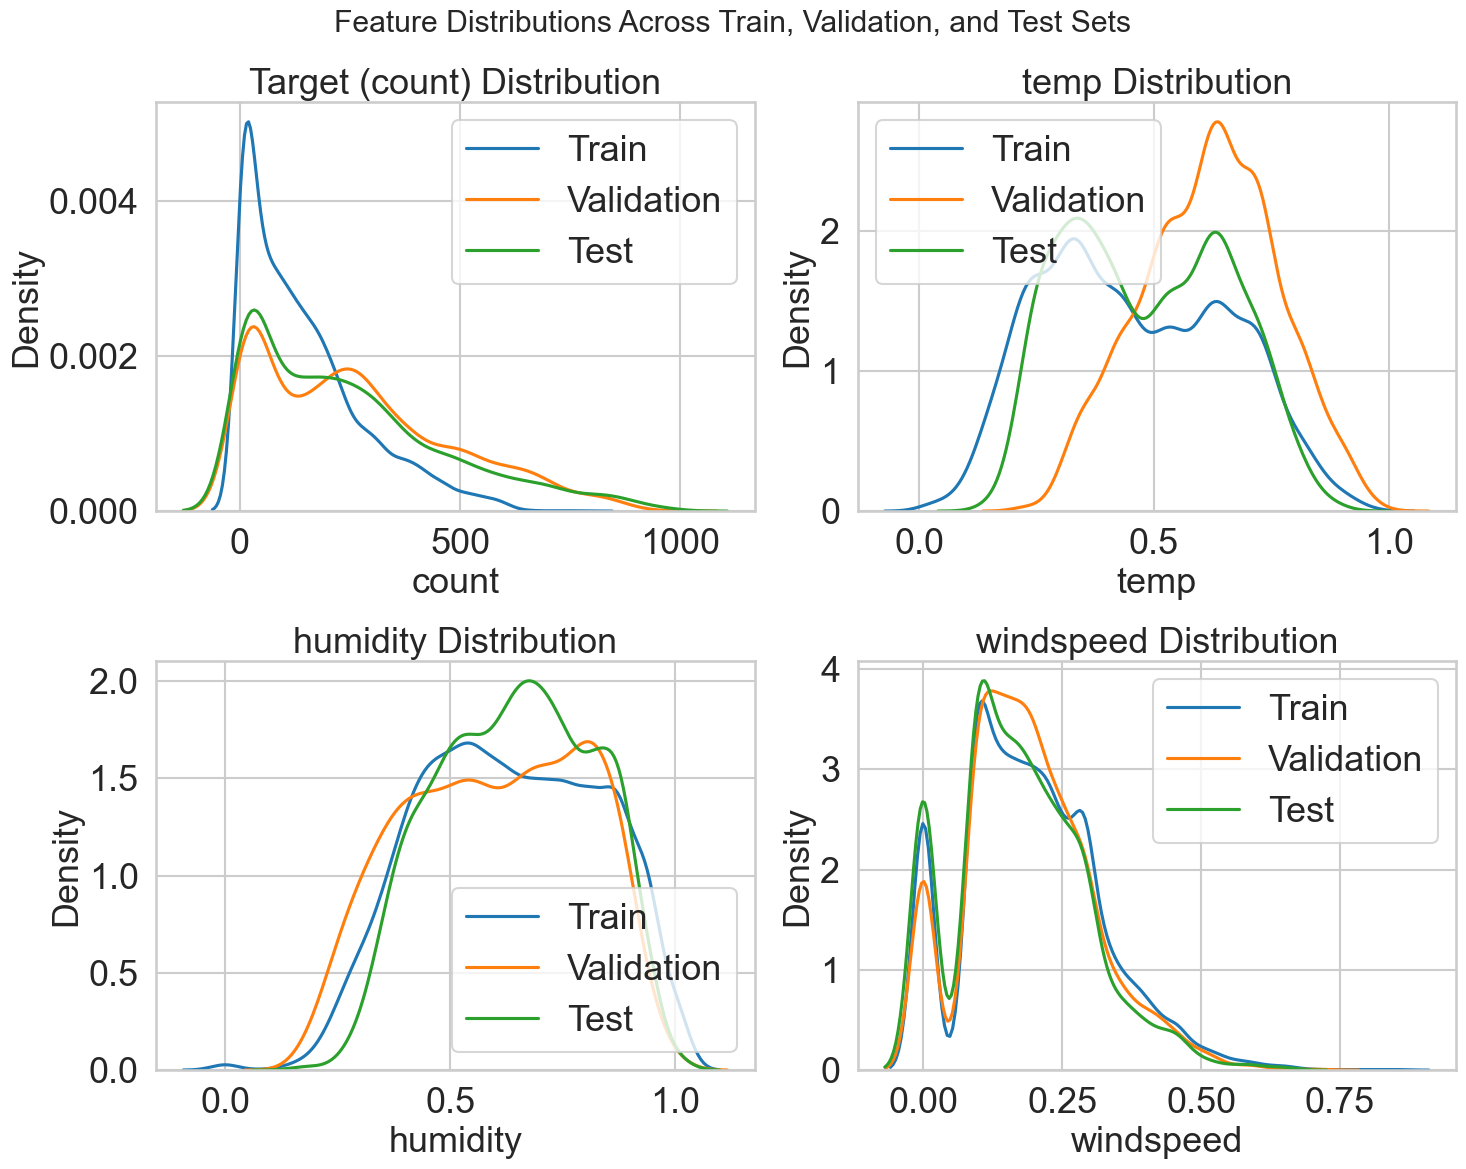

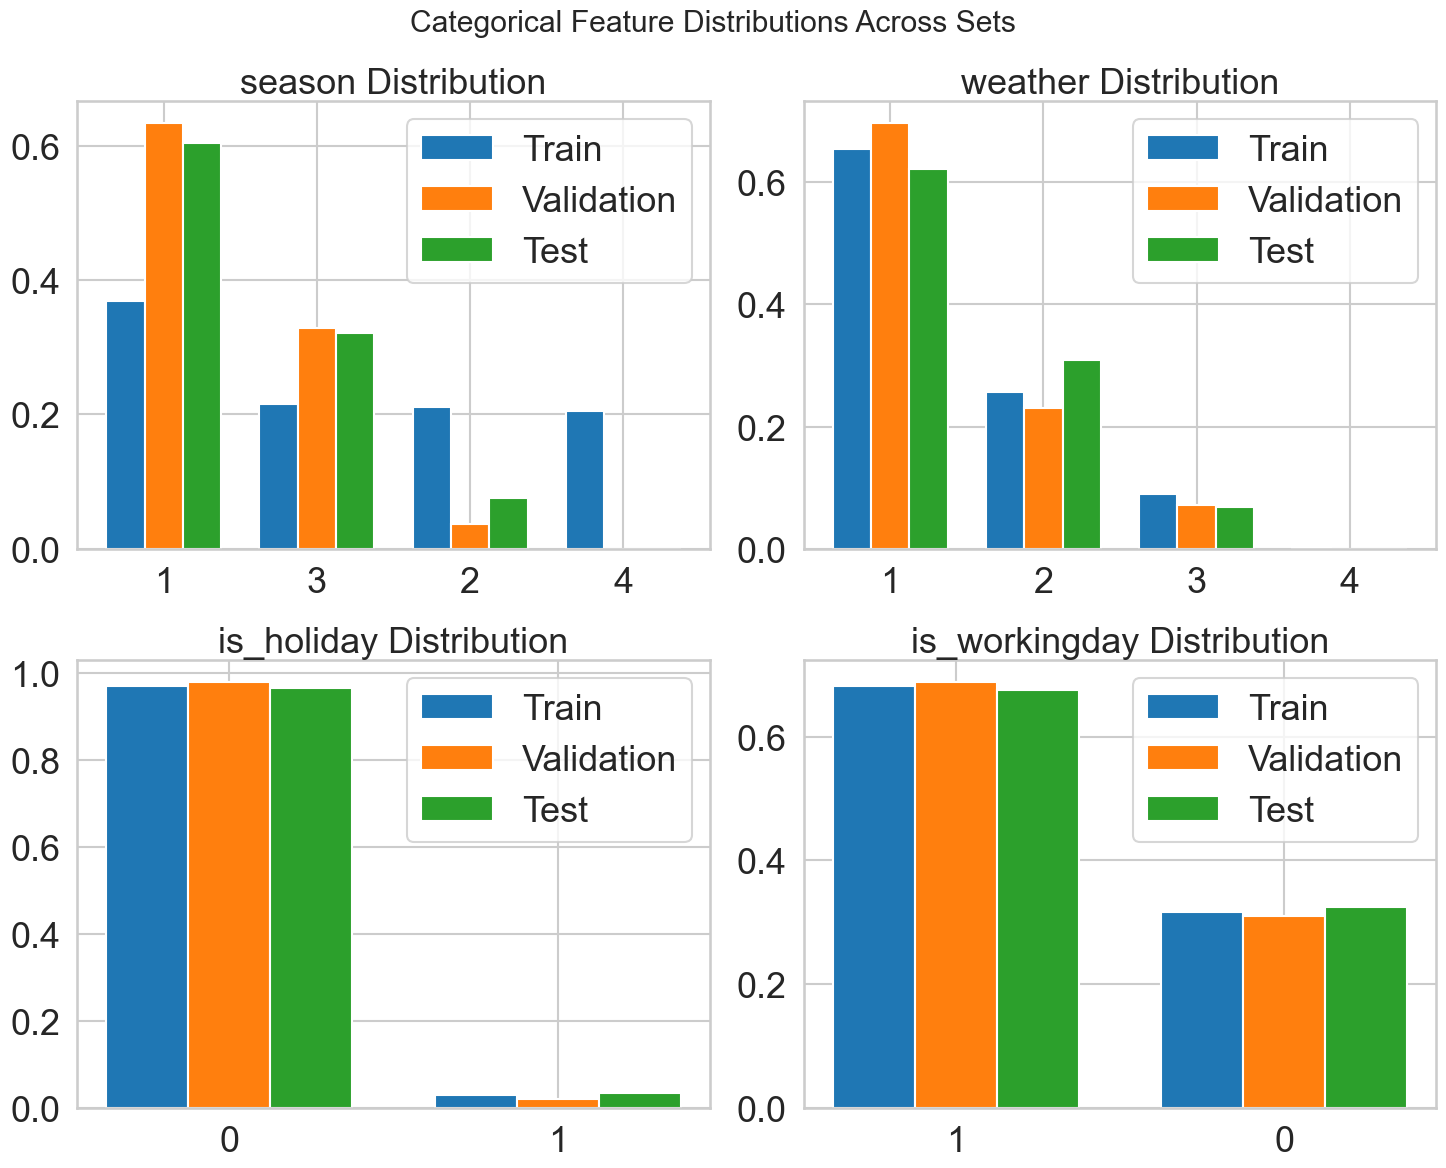

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions(X_train, X_val, X_test, y_train, y_val, y_test):
    # Set up the figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Feature Distributions Across Train, Validation, and Test Sets')
    
    # Flatten axes for easier iteration
    axes = axes.ravel()
    
    # Plot target variable (count) distribution
    ax = axes[0]
    sns.kdeplot(data=y_train, label='Train', ax=ax)
    sns.kdeplot(data=y_val, label='Validation', ax=ax)
    sns.kdeplot(data=y_test, label='Test', ax=ax)
    ax.set_title('Target (count) Distribution')
    ax.legend()
    
    # Print basic statistics for target variable
    print("Target (count) Statistics:")
    print("\nTrain:")
    print(f"Mean: {y_train.mean():.2f}")
    print(f"Std: {y_train.std():.2f}")
    print("\nValidation:")
    print(f"Mean: {y_val.mean():.2f}")
    print(f"Std: {y_val.std():.2f}")
    print("\nTest:")
    print(f"Mean: {y_test.mean():.2f}")
    print(f"Std: {y_test.std():.2f}")
    
    # Select a few important numeric features to plot
    numeric_features = ['temp', 'humidity', 'windspeed']
    
    for i, feature in enumerate(numeric_features, 1):
        ax = axes[i]
        sns.kdeplot(data=X_train[feature], label='Train', ax=ax)
        sns.kdeplot(data=X_val[feature], label='Validation', ax=ax)
        sns.kdeplot(data=X_test[feature], label='Test', ax=ax)
        ax.set_title(f'{feature} Distribution')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Check categorical variables distribution
    categorical_features = ['season', 'weather', 'is_holiday', 'is_workingday']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Categorical Feature Distributions Across Sets')
    axes = axes.ravel()
    
    for i, feature in enumerate(categorical_features):
        ax = axes[i]
        
        # Calculate proportions for each set
        train_props = X_train[feature].value_counts(normalize=True)
        val_props = X_val[feature].value_counts(normalize=True)
        test_props = X_test[feature].value_counts(normalize=True)
        
        # Create bar plot
        width = 0.25
        x = np.arange(len(train_props.index))
        
        ax.bar(x - width, train_props, width, label='Train')
        ax.bar(x, val_props, width, label='Validation')
        ax.bar(x + width, test_props, width, label='Test')
        
        ax.set_title(f'{feature} Distribution')
        ax.set_xticks(x)
        ax.set_xticklabels(train_props.index)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Run the distribution comparison
compare_distributions(X_train, X_val, X_test, y_train, y_val, y_test)

# 3. Feature Engineering

## `hour` and `weekday` Cyclic Encoding

I started by using sine and cosine encoding for hour and weekday features (inherently cyclical nature).

This is because when dealing with time-based features like hours (0-23) and weekdays (0-6), traditional numerical representations create artificial boundaries that don't reflect reality. (normally Sunday (6) and Monday (0) would appear far numerically even though they're consecutive days) 

The sine/cosine transformation elegantly solves this problem by mapping these features onto a circular space. This circular representation ensures that values at the end of a cycle smoothly transition to the beginning, which is especially important for capturing rental patterns that span these boundaries. For example, late-night rentals that extend from 23:00 to 00:00 are now represented with similar values, allowing the model to better learn these continuous patterns.
This encoding technique is particularly relevant for bike sharing prediction because rental behaviors often follow cyclical patterns both within days and across weeks. The smooth, continuous nature of sine/cosine encoding helps capture subtle transitions in rental patterns throughout the day, such as the gradual increase in rentals during morning rush hour or the tapering of activity in the evening. Furthermore, the encoding preserves the natural progression of weekdays, which is crucial for modeling the distinct differences between weekday commuter patterns and weekend leisure usage.
By using two components (sine and cosine) for each temporal feature, we maintain all the information about the original values while transforming them into a format that better represents their true cyclical relationship. This mathematical transformation provides our model with a more intuitive representation of time, leading to better learning of temporal patterns in bike rental behavior.

I started by creating the `cyclical_encode` function

In [26]:

def cyclical_encode(data, col, max_val):
    data_copy = data.copy()
    data_copy[f'{col}_sin'] = np.sin(2 * np.pi * data_copy[col].astype(float) / max_val)
    data_copy[f'{col}_cos'] = np.cos(2 * np.pi * data_copy[col].astype(float) / max_val)
    return data_copy

I applied cyclical encoding to hour (0-23) and weekday (0-6)

In [27]:
# hour (0-23)
X_train = cyclical_encode(X_train, 'hour', 24)
X_val = cyclical_encode(X_val, 'hour', 24)
X_test = cyclical_encode(X_test, 'hour', 24)

# weekday (0-6)
X_train = cyclical_encode(X_train, 'weekday', 7)
X_val = cyclical_encode(X_val, 'weekday', 7)
X_test = cyclical_encode(X_test, 'weekday', 7)


Then I dropped the original columns

In [28]:
columns_to_drop = ['hour', 'weekday']
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [29]:
X_train.head()

,season,year,month,is_holiday,is_workingday,weather,temp,humidity,windspeed,hour_sin,hour_cos,weekday_sin,weekday_cos
0,1,0,1,0,0,1,0.24,0.81,0.0,0.000000,1.000000,-0.781831,0.62349
1,1,0,1,0,0,1,0.22,0.80,0.0,0.258819,0.965926,-0.781831,0.62349
2,1,0,1,0,0,1,0.22,0.80,0.0,0.500000,0.866025,-0.781831,0.62349
3,1,0,1,0,0,1,0.24,0.75,0.0,0.707107,0.707107,-0.781831,0.62349
4,1,0,1,0,0,1,0.24,0.75,0.0,0.866025,0.500000,-0.781831,0.62349


## One-hot encoding categorical variables

Season:
The numerical values (1-4) don't represent meaningful magnitudes - winter (4) isn't "greater" than spring (1). Each season has its own distinct impact on bike rentals that should be learned independently.

Weather:
The numbers (1: clear to 4: heavy rain) don't represent ordered severity levels. Each weather condition affects rental behavior uniquely - heavy rain isn't necessarily twice as impactful as mist.

Month:
While months are ordered (1-12), their effect on bike rentals isn't linear. December (12) isn't necessarily better or worse for rentals than January (1). Each month can have unique patterns due to holidays, tourism, or weather.
Months have distinct, non-continuous patterns (e.g., July tourism, December holidays) that don't smoothly transition into each other


One-hot encoding allows the model to learn the specific influence of each category without imposing false numerical relationships.

In [30]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Define categorical columns
cat_cols = ['season', 'weather', 'month']

# Fit encoder on training data only to avoid data leakage
encoder.fit(X_train[cat_cols])

# Transform all sets
# Training set
encoded_train = encoder.transform(X_train[cat_cols])
encoded_train_df = pd.DataFrame(
    encoded_train,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_train.index
)
X_train = pd.concat([X_train.drop(columns=cat_cols), encoded_train_df], axis=1)

# Validation set
encoded_val = encoder.transform(X_val[cat_cols])
encoded_val_df = pd.DataFrame(
    encoded_val,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_val.index
)
X_val = pd.concat([X_val.drop(columns=cat_cols), encoded_val_df], axis=1)

# Test set
encoded_test = encoder.transform(X_test[cat_cols])
encoded_test_df = pd.DataFrame(
    encoded_test,
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test.index
)
X_test = pd.concat([X_test.drop(columns=cat_cols), encoded_test_df], axis=1)

# Print shape before and after
print("\nShape of data:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")


Shape of data:
X_train: (10427, 27)
X_val: (3476, 27)
X_test: (3476, 27)


In [32]:
X_train.head()

,year,is_holiday,is_workingday,temp,humidity,windspeed,hour_sin,hour_cos,weekday_sin,weekday_cos,season_2,season_3,season_4,weather_2,weather_3,weather_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0.24,0.81,0.0,0.000000,1.000000,-0.781831,0.62349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0.22,0.80,0.0,0.258819,0.965926,-0.781831,0.62349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0.22,0.80,0.0,0.500000,0.866025,-0.781831,0.62349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0.24,0.75,0.0,0.707107,0.707107,-0.781831,0.62349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0.24,0.75,0.0,0.866025,0.500000,-0.781831,0.62349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
